Total Number of NODES used 6912
Length:  0.3 Meter
Breadth: 0.1 Meter
Left Temperature:  100 Kelvin
Right Temperature:  5 Kelvin
Time to execute:  6.44106650352478 seconds


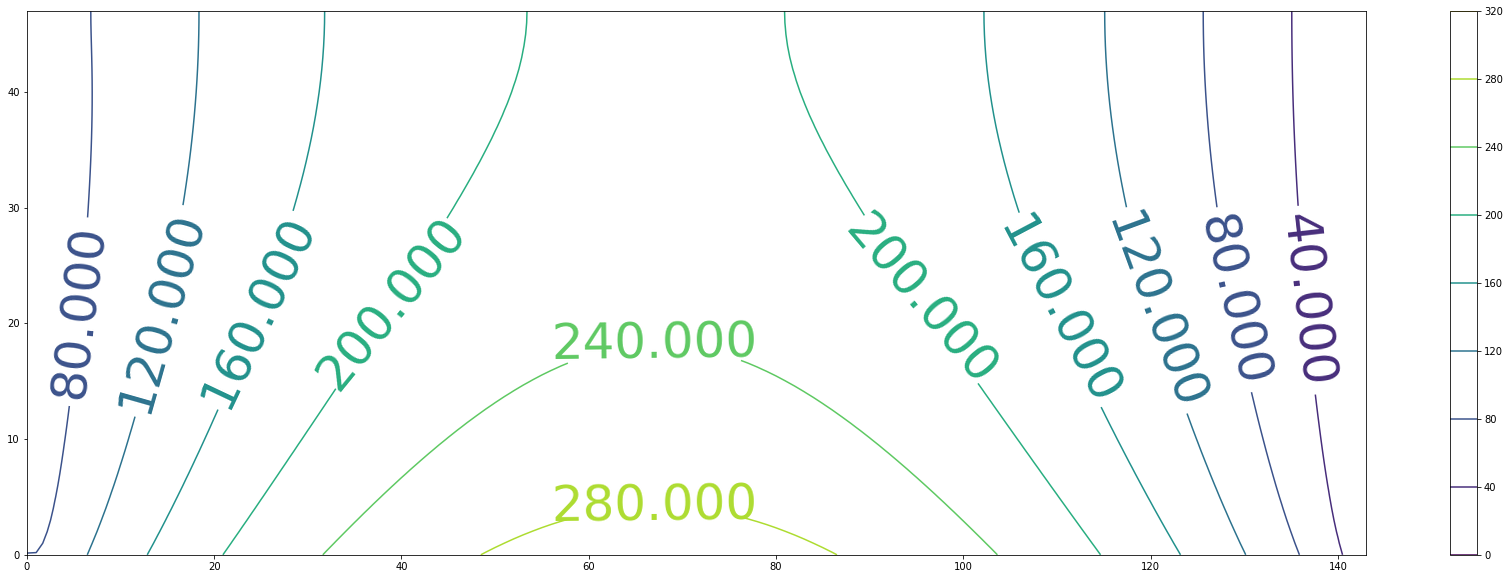

In [31]:
#The constants matrix
#Iron K = 55 W/mk

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy import linalg
import time

starttime=time.time()           #This records the start time
Length=int(144)                      #Length of the 2D Elements
Breadth=int(Length/3)                      #Breadth of the 2D Elements
points=int(Length*Breadth)           #This is the total number of nodes
A=0.5          #m^2             #The area of the Control volume
K=55       #conductivity        #The conductivity of the material
DeltaX=   0.3/Length  #in meter       #The X dimension of Control Volume
DeltaY=   0.1/Breadth  #in meter       #The y dimension of Contrl Volume
q=(A*K/DeltaX)                  
Main=np.zeros((points,points))  #Main Solution matrix
b=np.zeros((points,1))      #B matrix
FluxNorth=50000                 # boundary condition
FluxSouth=0                 # boundary condition
LeftTemperature=100             #Setting the Left Side temperature
RightTemperature=5              #Setting the Right Side temperature

discretization=np.zeros((Breadth,Length))       #matrix
nodes=1
for i in range(Breadth):
    for j in range(Length):
        discretization[i][j]=nodes
        nodes+=1      

for i in range(Breadth): ##CORNER POINTS ARE put 
    for j in range(Length):                                             #Top LEFT Corner
        if i == 0 and j == 0:
            Main[int(discretization[i][j]-1)][int(discretization[i][j]-1)]=(-5/2)*q
            Main[int(discretization[i][j]-1)][int(discretization[i][j+1]-1)]=0.5*q
            Main[int(discretization[i][j]-1)][int(discretization[i+1][j]-1)]=q
            b[0][0]=-(LeftTemperature*q)-FluxNorth
        if i == 0 and j == Length-1:                                    #TOP RIGHT corner
            Main[int(discretization[i][j]-1)][int(discretization[i][j]-1)]=(-5/2)*q
            Main[int(discretization[i][j]-1)][int(discretization[i][j-1]-1)]=0.5*q
            Main[int(discretization[i][j]-1)][int(discretization[i+1][j]-1)]=q
            b[int(discretization[i][j]-1)][0]=-(RightTemperature*q)-FluxNorth
        if i == Breadth-1 and j == 0:                                   #BOTTOM LEFT Corner
            Main[int(discretization[i][j]-1)][int(discretization[i][j]-1)]=(-5/2)*q
            Main[int(discretization[i][j]-1)][int(discretization[i][j+1]-1)]=0.5*q
            Main[int(discretization[i][j]-1)][int(discretization[i-1][j]-1)]=q
            b[int(discretization[i][j]-1)][0]=+FluxSouth-(LeftTemperature*q)
        if i == Breadth-1 and j== Length-1:                             #BOTTOM Right Corner
            Main[int(discretization[i][j]-1)][int(discretization[i][j]-1)]=(-5/2)*q
            Main[int(discretization[i][j]-1)][int(discretization[i][j-1]-1)]=0.5*q
            Main[int(discretization[i][j]-1)][int(discretization[i-1][j]-1)]=q
            b[int(discretization[i][j]-1)][0]=+FluxSouth-(RightTemperature*q)

for i in range(Breadth): #Upper edge initialization
    for j in range(Length):
        if i == 0 and j>0 and j<Length-1:
            Main[int(discretization[i][j]-1)][int(discretization[i][j]-1)]=-2*q
            Main[int(discretization[i][j]-1)][int(discretization[i][j-1]-1)]=0.5*q
            Main[int(discretization[i][j]-1)][int(discretization[i][j+1]-1)]=0.5*q
            Main[int(discretization[i][j]-1)][int(discretization[i+1][j]-1)]=q
            b[int(discretization[i][j]-1)][0]=-FluxNorth
        else:
            continue
            
for i in range(Breadth):    #Lower edge initialization
    for j in range(Length):
        if i == Breadth-1 and j>0 and j<Length-1:
            Main[int(discretization[i][j]-1)][int(discretization[i][j]-1)]=-2*q
            Main[int(discretization[i][j]-1)][int(discretization[i][j+1]-1)]=0.5*q
            Main[int(discretization[i][j]-1)][int(discretization[i][j-1]-1)]=0.5*q
            Main[int(discretization[i][j]-1)][int(discretization[i-1][j]-1)]=q
            b[int(discretization[i][j]-1)][0]=+FluxSouth
        else:
            continue
for i in range(Breadth):   #Left side initialization
    for j in range(Length):
        if j==0 and i>0 and i<Breadth-1:
            Main[int(discretization[i][j]-1)][int(discretization[i][j]-1)]=-5*q
            Main[int(discretization[i][j]-1)][int(discretization[i-1][j]-1)]=q
            Main[int(discretization[i][j]-1)][int(discretization[i+1][j]-1)]=q
            Main[int(discretization[i][j]-1)][int(discretization[i][j+1]-1)]=q
            b[int(discretization[i][j]-1)][0]=-LeftTemperature*q
        else:
            continue
            
for i in range(Breadth):         #Right side initialization
    for j in range(Length):
        if j == Length-1 and i>0 and i<Breadth-1:
            Main[int(discretization[i][j]-1)][int(discretization[i][j]-1)]=-5*q
            Main[int(discretization[i][j]-1)][int(discretization[i][j-1]-1)]=q
            Main[int(discretization[i][j]-1)][int(discretization[i+1][j]-1)]=q
            Main[int(discretization[i][j]-1)][int(discretization[i-1][j]-1)]=q
            b[int(discretization[i][j]-1)][0]=-RightTemperature*q
        else:
            continue

for i in range(Breadth):        #All the points in the middle of the CFD
    for j in range(Length):
        if i>0 and i<Breadth-1 and j>0 and j<Length-1:
            Main[int(discretization[i][j]-1)][int(discretization[i][j]-1)]=-4*q
            Main[int(discretization[i][j]-1)][int(discretization[i+1][j]-1)]=q
            Main[int(discretization[i][j]-1)][int(discretization[i-1][j]-1)]=q
            Main[int(discretization[i][j]-1)][int(discretization[i][j+1]-1)]=q
            Main[int(discretization[i][j]-1)][int(discretization[i][j-1]-1)]=q
            b[int(discretization[i][j]-1)][0]=0.0
        else:
            continue
#print(Main)
#print(b)
#print("The Tenperature at the nodes have been displayed below")
#print(np.dot(inv(Main),b))
#solution=np.dot(inv(Main),b)
solution=linalg.solve(Main,b)
print("Total Number of NODES used",points)
SerialNumbers=np.zeros((points,1))
h=0
for i in range(points):
    if h>Length-1:
        h=0
    SerialNumbers[i][0]=h
    h+=1
#print(SerialNumbers)
#plt.plot(SerialNumbers[:points-Length],solution[:points-Length])
print("Length: ",DeltaX*Length,"Meter")
print("Breadth:",DeltaY*(Breadth),"Meter")
print("Left Temperature: ",LeftTemperature,"Kelvin")
print("Right Temperature: ", RightTemperature,"Kelvin")
print("Time to execute: ",time.time()-starttime, "seconds")
Interior=np.zeros((Breadth,Length))
node=0
for i in range(Breadth):
    for j in range(Length):
        Interior[i][j]=solution[node][0]
        node+=1
#print(Interior)
fig=plt.figure(figsize=(30,10))
cp=plt.contour(Interior)
plt.clabel(cp,inline=True,fontsize=50)
plt.colorbar()